## 피처와 Rank간 상관관계 분석

In [5]:
import pandas as pd

In [10]:
data = pd.read_csv("data1.csv", index_col=0)


In [11]:
import pickle
with open('../scalers/views_scaler.pkl', 'rb') as f:
    views_scaler = pickle.load(f)
with open('../scalers/n_score_scaler.pkl', 'rb') as f:
    n_score_scaler = pickle.load(f)
with open('../scalers/g_score_scaler.pkl', 'rb') as f:
    g_score_scaler = pickle.load(f)
with open('../scalers/runtime_scaler.pkl', 'rb') as f:
    runtime_scaler = pickle.load(f)


In [12]:
data[["Weekly Views"]] = views_scaler.inverse_transform(data[["Weekly Views"]])
data[["n_score"]] = n_score_scaler.inverse_transform(data[["n_score"]])
data[["g_score"]] = g_score_scaler.inverse_transform(data[["g_score"]])
data[["Runtime"]] = runtime_scaler.inverse_transform(data[["Runtime"]])

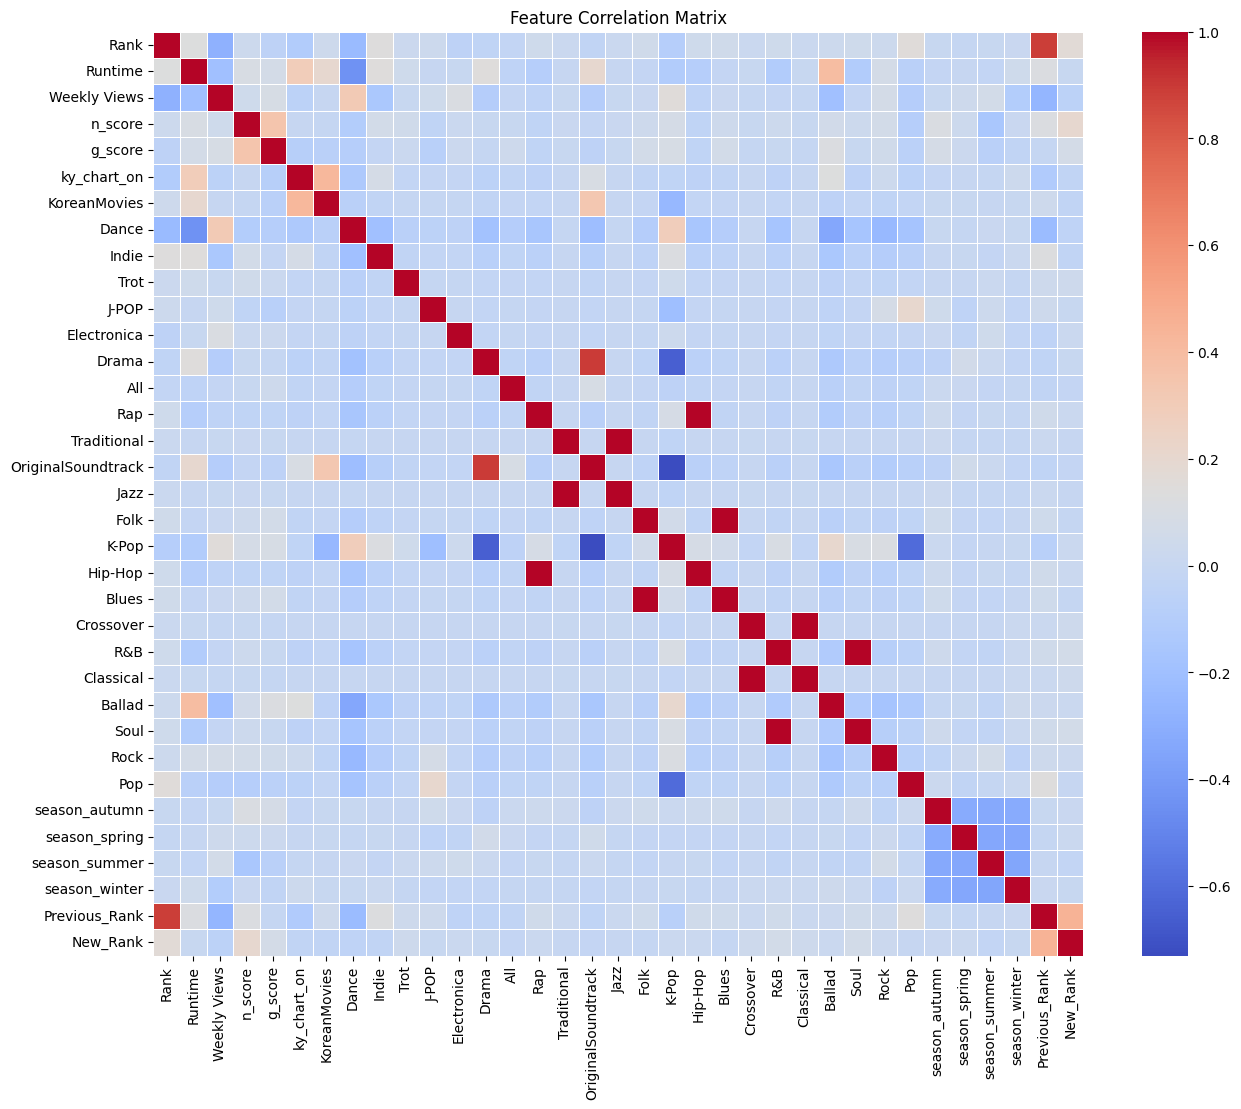

[('OriginalSoundtrack', 'Drama'),
 ('Jazz', 'Traditional'),
 ('Hip-Hop', 'Rap'),
 ('Blues', 'Folk'),
 ('Classical', 'Crossover'),
 ('Soul', 'R&B'),
 ('Previous_Rank', 'Rank')]

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation matrix to visualize the relationships between features
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Identify features with high correlation (threshold > 0.8)
high_corr_pairs = []

threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display highly correlated feature pairs
high_corr_pairs